<a href="https://colab.research.google.com/github/viniciusgomesbatista/Analytics/blob/main/An%C3%A1lise_de_farm%C3%A1cias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO

**Introdução**

A escolha do tema de farmácias para este trabalho surge da relevância que esses estabelecimentos possuem no cotidiano das grandes cidades, especialmente em uma metrópole dinâmica e multifacetada como o Rio de Janeiro. Farmácias desempenham um papel essencial na promoção da saúde pública, oferecendo acesso a medicamentos, produtos de higiene e bem-estar, além de serviços que facilitam o cuidado com a saúde de pessoas de todas as faixas etárias. Com a crescente importância das farmácias como pontos de conveniência e apoio à saúde, entender os fatores que influenciam sua distribuição e demanda nos bairros cariocas é crucial para desenvolver estratégias de marketing mais eficientes e direcionadas.

O Rio de Janeiro, com sua diversidade socioeconômica e geográfica, oferece um cenário ideal para uma análise detalhada do setor farmacêutico. Dividida entre áreas de alta densidade urbana e regiões periféricas em expansão, a cidade possui bairros com perfis demográficos e econômicos distintos, o que impacta diretamente na demanda por serviços de farmácia. Em áreas como a Zona Oeste, onde a população é numerosa e composta por famílias jovens, a demanda por produtos de conveniência e medicamentos de uso ocasional é alta. Em contraste, bairros tradicionais como Copacabana e Tijuca, com uma alta concentração de idosos, exigem uma oferta voltada a medicamentos de uso contínuo e cuidados especializados.

Este trabalho busca analisar as correlações entre a presença de farmácias e indicadores populacionais, como densidade demográfica, perfil etário e renda per capita, para identificar as necessidades específicas de cada região. A partir dessa análise, é possível compreender melhor como os fatores socioeconômicos e demográficos impactam a distribuição e a demanda por farmácias no Rio de Janeiro. Este entendimento não só beneficia o setor de marketing e planejamento estratégico, mas também contribui para que as farmácias desempenhem um papel mais assertivo no atendimento às necessidades de saúde da população carioca, promovendo bem-estar e acessibilidade em todas as áreas da cidade.

# FONTES DE DADOS

**Fontes de Dados**

Para realizar uma análise detalhada e precisa sobre a distribuição de farmácias no Rio de Janeiro, foi necessário integrar diversas fontes de dados que permitissem um entendimento completo dos aspectos comerciais, demográficos e socioeconômicos dos bairros cariocas. Abaixo, descrevemos cada uma das fontes utilizadas e a relevância de cada uma para este trabalho.

### 1. **Dados do Cadastro Nacional de Pessoas Jurídicas (CNPJ)**

A primeira e principal fonte de dados para identificar a presença e a quantidade de farmácias foi a base de dados do **Cadastro Nacional de Pessoas Jurídicas (CNPJ)**, disponibilizada pelo **Ministério da Economia**. Essa base foi consultada por meio da plataforma **Base dos Dados**, que facilita o acesso a conjuntos de dados do governo.

Os dados de CNPJ fornecem uma visão atualizada e detalhada sobre o universo de empresas registradas no Brasil, incluindo informações sobre a atividade econômica (CNAE), situação cadastral, quadro societário e administradores das pessoas jurídicas. Para nosso estudo, focamos especificamente no código CNAE **4771701**, que representa o "Comércio varejista de produtos farmacêuticos, sem manipulação de fórmulas". Esse filtro permitiu a identificação de todas as farmácias registradas e ativas no município do Rio de Janeiro (ID do município: 3304557) em uma data específica, 15 de março de 2024, para garantir a consistência temporal da análise.

A consulta foi realizada com a seguinte instrução SQL:
```sql
SELECT * FROM `basedosdados.br_me_cnpj.estabelecimentos`
WHERE data = '2024-03-15' and cnae_fiscal_principal = '4771701' and id_municipio = '3304557' and situacao_cadastral = '2'
```

Esse conjunto de dados possui uma característica peculiar: ele é atualizado em forma de "fotografias" periódicas, o que significa que cada extração representa o estado do cadastro em uma data específica. Essa abordagem é necessária devido à constante atualização dos atributos do CNPJ, como a situação cadastral e o quadro societário. Cada "fotografia" armazena o status atual das empresas naquele momento, o que pode resultar em repetições de CNPJs se mais de uma data for selecionada. Para evitar esse tipo de duplicidade e manter a consistência dos dados, selecionamos apenas uma data (15 de março de 2024) para representar o cenário das farmácias no Rio de Janeiro.

Acesso: https://basedosdados.org/dataset/e43f0d5b-43cf-4bfb-8d90-c38a4e0d7c4f?table=b8432ff5-06c8-45ca-b8b6-33fceb24089d

### 2. **Dados Populacionais e Demográficos do Rio de Janeiro**

Para compreender o contexto demográfico dos bairros e como ele influencia a distribuição e a demanda por farmácias, utilizamos dados populacionais e de idade dos bairros do Rio de Janeiro, extraídos da plataforma **Data.Rio**, que compila informações da **Prefeitura do Rio de Janeiro**. Estes dados foram essenciais para entender a composição etária da população, uma variável crucial para identificar as necessidades de saúde específicas de cada bairro.

O conjunto "População por idade dos bairros do Rio de Janeiro (2010)" nos permitiu avaliar a distribuição etária nos bairros, segmentada em faixas de idade. Esse nível de detalhe foi importante para identificar, por exemplo, bairros com alta concentração de idosos, que têm maior demanda por medicamentos de uso contínuo, e áreas com uma população jovem predominante, onde há maior demanda por produtos de conveniência e cuidados preventivos. Embora os dados sejam de 2010, eles fornecem uma base importante para analisar padrões demográficos que, apesar de possíveis mudanças ao longo dos anos, ainda servem como uma referência para o perfil populacional de cada bairro.

Acesso :  
  https://www.data.rio/datasets/PCRJ::limite-de-bairros/explore  
  https://www.data.rio/documents/e68e54eaa6bb484dbb40828acf2b3e7e/about


### 3. **Dados de Renda dos Bairros do Rio de Janeiro**

Os dados de renda dos bairros também foram obtidos através do **Data.Rio** e representam um aspecto fundamental para nossa análise. O conjunto de dados "População por renda dos bairros do Rio de Janeiro (2010)" permitiu identificar a distribuição de renda per capita por decil e quintil em cada bairro. Este detalhamento foi essencial para entender a variabilidade socioeconômica entre os bairros e avaliar como a renda influencia a presença e a demanda por farmácias.

A análise de renda por faixas possibilitou identificar áreas com maior poder aquisitivo, onde farmácias podem ofertar produtos premium e serviços diferenciados, e bairros de baixa renda, onde a demanda tende a ser por produtos essenciais e de preços acessíveis. A correlação entre renda e quantidade de farmácias mostrou-se baixa, indicando que a presença de farmácias é menos influenciada pela renda e mais pela densidade populacional e perfil etário. No entanto, as informações de renda permitem ajustar a oferta de produtos e campanhas de marketing conforme o poder aquisitivo de cada bairro.

Acesso : https://www.data.rio/documents/fcb522e7e10c4aa388f64407169aa821/about

### Resumo das Fontes de Dados

Essas quatro fontes – dados do CNPJ para identificação das farmácias, dados populacionais para análise demográfica e dados de renda para avaliação socioeconômica – foram cuidadosamente selecionadas para proporcionar uma visão integrada e contextualizada do cenário de farmácias no Rio de Janeiro. Juntas, elas nos permitem não apenas mapear a distribuição física das farmácias, mas também entender como fatores demográficos e socioeconômicos impactam o perfil de consumo em cada bairro.

Ao consolidar essas informações, foi possível construir um perfil detalhado dos bairros cariocas e identificar oportunidades de segmentação e personalização das campanhas de marketing, alinhando a oferta das farmácias às necessidades e características específicas de cada região da cidade.

# ANÁLISE E INTERPRETAÇÃO DOS DADOS

In [2]:
import pandas as pd
import numpy as np

## CNPJ

In [3]:
farm = pd.read_csv('/content/drive/MyDrive/Trabalho/Freelancer Farmácias/cnpj rj.csv')

In [4]:
farm.columns

Index(['data', 'cnpj', 'cnpj_basico', 'cnpj_ordem', 'cnpj_dv',
       'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral',
       'data_situacao_cadastral', 'motivo_situacao_cadastral',
       'nome_cidade_exterior', 'id_pais', 'data_inicio_atividade',
       'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'sigla_uf',
       'id_municipio', 'id_municipio_rf', 'tipo_logradouro', 'logradouro',
       'numero', 'complemento', 'bairro', 'cep', 'ddd_1', 'telefone_1',
       'ddd_2', 'telefone_2', 'ddd_fax', 'fax', 'email', 'situacao_especial',
       'data_situacao_especial'],
      dtype='object')

In [5]:
farm.head()

,data,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,email,situacao_especial,data_situacao_especial
0,2024-03-15,33438250055735,33438250,557,35,2,DROGARIA PACHECO,2,2017-10-18,0,...,20030041,21.0,24722828,NaN,NaN,NaN,NaN,fiscal@dpsp.com.br,NaN,NaN
1,2024-03-15,43024782000705,43024782,7,5,2,NaN,2,2023-05-04,0,...,20040050,22.0,22222222,NaN,NaN,NaN,NaN,departamentolegalfarma@outlook.com,NaN,NaN
2,2024-03-15,18446440000132,18446440,1,32,1,STAFFORCE,2,2013-07-08,0,...,20041002,21.0,22529192,21.0,22429309.0,21.0,2520455.0,eduardomendescontador@oi.com.br,NaN,NaN
3,2024-03-15,29111645000183,29111645,1,83,1,THOR SUPLEMENTOS,2,2017-11-21,0,...,20050020,21.0,72831986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-15,261307000308,261307,3,8,2,ANACONT,2,2022-11-18,0,...,20081311,21.0,22107412,NaN,NaN,21.0,25323868.0,NaN,NaN,NaN


In [6]:
farm['cnpj'].nunique()

3331

No Rio de Janeiro exisrem 3.331 farmácias (Comércio varejista de produtos farmacêuticos, sem manipulação de fórmulas)distribuídas no região urbana.

In [7]:
farm['cnpj_basico'].nunique()

2593

Das 3.331 farmácias, 2.593 farmácias são farmácias de rede, isto é, 77,84% das farmácias são de grupos possuem mais de uma unidade, exemplo Drogasil, Drogaria São Paulo, Drogaria Pacheco. Somente 738 são farmácias independetes com somente uma unidade, correspondendo a 22,15% do mercado. Isso indica que o mercado de varejo farmacêutico é dominado por farmácias de rede, que tem grande peso de mercado.

Temas interessantes a pesquisar: o que as farmácias de rede se destacam e são melhores? quais os impactos dela no mercado?

In [8]:
redes = farm.groupby('cnpj_basico').size().reset_index().rename(columns={0:'qtd'})
redes['%'] = (redes['qtd']/redes['qtd'].sum())*100
redes.sort_values('qtd', ascending=False).head(10)

,cnpj_basico,qtd,%
1402,33438250,221,6.634644
2556,61585865,114,3.422396
20,285753,101,3.032122
1823,42225938,78,2.341639
2507,53257892,28,0.840588
1607,37895053,24,0.720504
1118,28763118,21,0.630441
1389,33355207,17,0.510357
888,23007791,14,0.420294
241,6626253,11,0.330231


In [9]:
nome = farm.groupby('nome_fantasia').size().reset_index().rename(columns={0:'qtd'})
nome['%'] = (nome['qtd']/nome['qtd'].sum())*100
nome.sort_values('qtd', ascending=False).head(10)

,nome_fantasia,qtd,%
349,DROGARIA PACHECO,156,7.386364
475,DROGARIA VENANCIO,91,4.308712
639,DROGASMIL,65,3.077652
590,DROGARIAS PACHECO,52,2.462121
558,DROGARIAS MAIS BARATO,42,1.988636
578,DROGARIAS MUNDIAL,38,1.799242
584,DROGARIAS OFERTAO,34,1.609848
176,DROGARIA CRISTAL,30,1.420455
521,DROGARIAS CARIOCA,29,1.373106
568,DROGARIAS MAX,28,1.325758


In [17]:
redes = farm.groupby('cnpj_basico').agg(
    qtd=('cnpj_basico', 'size'),
    nome_fantasia=('nome_fantasia', 'first')
).reset_index()
redes['%'] = (redes['qtd'] / 3331) * 100
top_redes = redes.sort_values('qtd', ascending=False).head(10)
top_redes

,cnpj_basico,qtd,nome_fantasia,%
1402,33438250,221,DROGARIA PACHECO,6.634644
2556,61585865,114,None,3.422396
20,285753,101,DROGARIA VENANCIO,3.032122
1823,42225938,78,DROGASMIL,2.341639
2507,53257892,28,DROGARIAS OFERTAO,0.840588
1607,37895053,24,DROGARIA ESSENCIAL,0.720504
1118,28763118,21,None,0.630441
1389,33355207,17,DROGARIA DO POVO DE SANTA CRUZ,0.510357
888,23007791,14,FARMADEZ,0.420294
241,6626253,11,FARMACIA PAGUE MENOS,0.330231


In [11]:
#Drogasil , procurado por https://casadosdados.com.br/solucao/cnpj/raia-drogasil-sa-61585865093907
farm['cnpj'].loc[farm['cnpj_basico']==61585865].sample()

,cnpj
815,61585865321110


In [12]:
#A NOSSA DROGARIA DE CAXIAS, procura em http://cnes2.datasus.gov.br/Mod_Ind_Unidade_Listar.asp?VTipo=43&VListar=1&VEstado=33&VMun=330455&VSubUni=&VComp=
farm['cnpj'].loc[farm['cnpj_basico']==28763118].sample()

,cnpj
1923,28763118004501


In [13]:
top_redes['nome_fantasia'].unique()

array(['DROGARIA PACHECO', None, 'DROGARIA VENANCIO', 'DROGASMIL',
       'DROGARIAS OFERTAO', 'DROGARIA ESSENCIAL',
       'DROGARIA DO POVO DE SANTA CRUZ', 'FARMADEZ',
       'FARMACIA PAGUE MENOS'], dtype=object)

As 10 maiores farmácias de rede do Rio de Janeiro são : 'DROGARIA PACHECO', 'DROGASIL', 'DROGARIA VENANCIO', 'DROGASMIL', 'DROGARIAS OFERTAO', 'DROGARIA ESSENCIAL', 'A NOSSA DROGARIA DE CAXIAS', 'DROGARIA DO POVO DE SANTA CRUZ', 'FARMADEZ' e 'FARMACIA PAGUE MENOS', respectivamente nessa ordem.


In [19]:
bairro = farm.groupby('bairro').size().reset_index().rename(columns={0:'Quantidade','bairro':'Bairro'})
bairro['%'] = (bairro['Quantidade']/bairro['Quantidade'].sum())*100
bairro.sort_values('Quantidade', ascending=False).head(10).round(2)

,Bairro,Quantidade,%
28,CAMPO GRANDE,270,8.11
10,BANGU,134,4.02
11,BARRA DA TIJUCA,126,3.78
151,SANTA CRUZ,114,3.42
34,CENTRO,97,2.91
87,JACAREPAGUA,96,2.88
42,COPACABANA,92,2.76
141,RECREIO DOS BANDEIRANTES,83,2.49
169,TIJUCA,81,2.43
138,REALENGO,77,2.31


Esta tabela apresenta dados sobre a distribuição de farmácias em diferentes bairros do Rio de Janeiro. A coluna "bairro" indica os nomes dos bairros, enquanto "qtd" mostra a quantidade de farmácias em cada bairro e "%" representa a porcentagem relativa de farmácias em relação ao total.

Observações principais:

1. **Concentração de Farmácias**:
   - O bairro **Campo Grande** possui a maior quantidade de farmácias, com 270 estabelecimentos, representando 8,11% do total.
   - Outros bairros com uma quantidade significativa de farmácias incluem **Bangu** (4,02%), **Barra da Tijuca** (3,78%), e **Santa Cruz** (3,42%).

2. **Distribuição Relativa**:
   - A concentração de farmácias não é uniforme; alguns bairros apresentam uma proporção mais elevada, enquanto outros, como **Realengo** e **Tijuca**, possuem porcentagens ligeiramente menores, em torno de 2,3%.

3. **Destaque de Regiões**:
   - Muitos dos bairros com maior quantidade de farmácias são conhecidos por serem áreas populosas e com grande demanda por serviços de saúde, o que pode explicar a maior presença desses estabelecimentos.

Essas informações ajudam a entender onde as farmácias estão mais concentradas e podem fornecer insights para análises adicionais, como identificação de regiões menos atendidas ou áreas com potencial de expansão.

1. Campo Grande – Rio de Janeiro
Como você viu, Campo Grande no Rio de Janeiro é o bairro mais populoso do Brasil. Veja agora mais alguns detalhes sobre o bairro carioca:

Faixa etária: A faixa etária mais presente está entre 35 a 49 anos, representando 23,47% da população do bairro.
Gênero: As mulheres são maioria, com um total de 197.902 habitantes do gênero feminino, representando 53,01% dos habitantes.
Faixa de renda domiciliar: A faixa de renda domiciliar mensal mais presente é a B2 (de R$ 4.607 a R$ 8.150), sendo 19,21% da renda média total do bairro.
Nível de instrução: A maior parte dos residentes do bairro não possui instrução e não têm o ensino fundamental completo, representando 38,6%. No segundo lugar está a população com ensino médio completo e superior incompleto, representando 34,4%.
Domicílios: A grande maioria da população do bairro vive em casas (91,96%) e a maior parte das pessoas mora em domicílios com 3 moradores (24,77%).

https://geofusion.com.br/blog/bairros-mais-populosos-do-brasil/

Renda média por setores censitários, no bairro Campo Grande, em Rio de Janeiro – RJ, onde as regiões em verde representam maior renda, e as regiões em vermelho, menor.
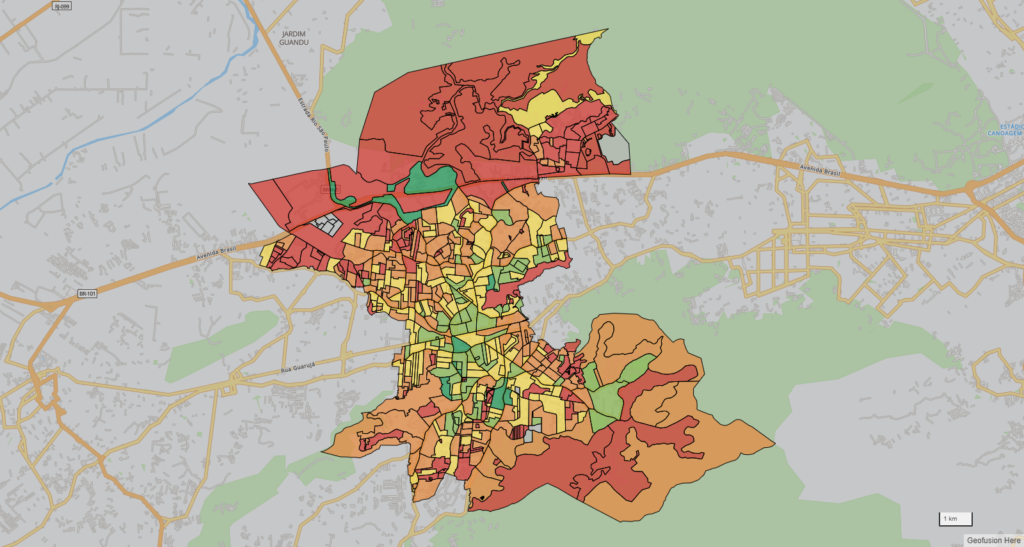

In [20]:
cep = farm.groupby('cep').size().reset_index().rename(columns={0:'qtd'})
cep['%'] = (cep['qtd']/bairro['qtd'].sum())*100
cep.sort_values('qtd', ascending=False).head(10)

KeyError: 'qtd'

## Bairros - Data Rio

In [21]:
bairros = pd.read_csv('/content/drive/MyDrive/Trabalho/Freelancer Farmácias/Censo_2022%3A_Popula%C3%A7%C3%A3o_e_domic%C3%ADlios_por_bairros_(dados_preliminares).csv')

In [22]:
bairros['população/domicílios'] = bairros['Total_de_pessoas_2022']/bairros['Total_de_domicilios_2022']
bairros.head()

,nome,codbairro,regiao_adm,codra,area_plane,Total_de_pessoas_2010,Total_de_pessoas_2022,diferenca_de_pessoas,Total_de_domicilios_2022,Total_DP_2022,Total_DC,Total_DP_Ocup_2010,Total_DP_Ocup_2022,diferenca_de_DP,Shape_Length,Shape_Area,OBJECTID_1,população/domicílios
0,Grumari,133,BARRA DA TIJUCA,24,4,167,184,17,85,85,0,44,68,24,23375.374038,9.598851e+06,1,2.164706
1,Jardim Sulacap,137,REALENGO,33,5,13062,14396,1334,6389,6387,2,4390,5481,1091,14519.328424,7.869225e+06,2,2.253248
2,Saúde,1,PORTUARIA,1,1,2749,1876,-873,1001,988,13,946,801,-145,2646.220568,3.638186e+05,3,1.874126
3,Magalhães Bastos,138,REALENGO,33,5,24430,20938,-3492,9340,9336,4,8092,8045,-47,6902.663944,1.975955e+06,4,2.241756
4,Realengo,139,REALENGO,33,5,180123,165881,-14242,72817,72801,16,59259,63429,4170,30896.866166,2.605427e+07,5,2.278053


### Análise dos nomes

In [23]:
sorted(bairros['nome'].unique())

['Abolição',
 'Acari',
 'Alto da Boa Vista',
 'Anchieta',
 'Andaraí',
 'Anil',
 'Bancários',
 'Bangu',
 'Barra Olímpica',
 'Barra da Tijuca',
 'Barra de Guaratiba',
 'Barros Filho',
 'Benfica',
 'Bento Ribeiro',
 'Bonsucesso',
 'Botafogo',
 'Brás de Pina',
 'Cachambi',
 'Cacuia',
 'Caju',
 'Camorim',
 'Campinho',
 'Campo Grande',
 'Campo dos Afonsos',
 'Cascadura',
 'Catete',
 'Catumbi',
 'Cavalcanti',
 'Centro',
 'Cidade Nova',
 'Cidade Universitária',
 'Cidade de Deus',
 'Cocotá',
 'Coelho Neto',
 'Colégio',
 'Complexo do Alemão',
 'Copacabana',
 'Cordovil',
 'Cosme Velho',
 'Cosmos',
 'Costa Barros',
 'Curicica',
 'Del Castilho',
 'Deodoro',
 'Encantado',
 'Engenheiro Leal',
 'Engenho Novo',
 'Engenho da Rainha',
 'Engenho de Dentro',
 'Estácio',
 'Flamengo',
 'Freguesia (Ilha)',
 'Freguesia (Jacarepaguá)',
 'Galeão',
 'Gamboa',
 'Gardênia Azul',
 'Gericinó',
 'Glória',
 'Grajaú',
 'Grumari',
 'Guadalupe',
 'Guaratiba',
 'Gávea',
 'Higienópolis',
 'Honório Gurgel',
 'Humaitá',
 'Ilh

In [24]:
sorted(farm['bairro'].unique())

[' MARE',
 '(FREGUESIA) ILHA DO GOVERNADOR',
 'ABOLICAO',
 'ACARI',
 'ALTO DA BOA VISTA',
 'ANCHIETA',
 'ANDARAI',
 'ANIL',
 'BAIRRO DE FATIMA',
 'BANCARIOS',
 'BANGU',
 'BARRA DA TIJUCA',
 'BARRA DE GUARATIBA',
 'BARROS FILHO',
 'BENFICA',
 'BENTO RIBEIRO',
 'BONSECESSO',
 'BONSUCESSO',
 'BOTAFOGO',
 'BRAS DE PINA',
 'BRAZ DE PINA',
 'CACHAMBI',
 'CACUIA',
 'CAJU',
 'CAMORIM',
 'CAMPINHO',
 'CAMPO  GRANDE',
 'CAMPO DOS AFONSOS',
 'CAMPO GRANDE',
 'CASCADURA',
 'CATETE',
 'CATUMBI',
 'CAVALCANTE',
 'CAVALCANTI',
 'CENTRO',
 'CIDADE DE DEUS',
 'CIDADE NOVA',
 'CIDADE UNIVERSITARIA',
 'COCOTA',
 'COELHO NETO',
 'COLEGIO',
 'COMPLEXO DO ALEMAO',
 'COPACABANA',
 'CORDOVIL',
 'COSME VELHO',
 'COSMOS',
 'COSTA BARROS',
 'CPACABANA',
 'CPO GRANDE',
 'CURICICA',
 'DEL CASTILHO',
 'DEODORO',
 'ENCANTADO',
 'ENGENHEIRO LEAL',
 'ENGENHO DA RAINHA',
 'ENGENHO DE DENTRO',
 'ENGENHO NOVO',
 'ESTACIO',
 'ESTACIO DE SA',
 'FLAMENGO',
 'FREGUESIA',
 'FREGUESIA (ILHA DO GOVERNADOR)',
 'FREGUESIA (ILHA)'

In [25]:
pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.0 MB/s eta 0:00:00


In [26]:
from fuzzywuzzy import process

# Extrai valores únicos de ambos os DataFrames
bairros_nomes = bairros['nome'].unique()
farm_nomes = farm['bairro'].unique()

# Cria um dicionário de mapeamento entre 'farm_nomes' e o bairro mais próximo em 'bairros_nomes'
mapeamento_bairros = {nome: process.extractOne(nome, bairros_nomes)[0] for nome in farm_nomes}
mapeamento_bairros

{'CENTRO': 'Centro',
 'SAUDE': 'Saúde',
 'ESTACIO': 'Estácio',
 'ESTACIO DE SA': 'Ricardo de Albuquerque',
 'SANTO CRISTO': 'Santo Cristo',
 'CATUMBI': 'Catumbi',
 'RIO COMPRIDO': 'Rio Comprido',
 'PRACA DA BANDEIRA': 'Praça da Bandeira',
 'TIJUCA': 'Tijuca',
 'ALTO DA BOA VISTA': 'Alto da Boa Vista',
 'GRAJAU': 'Grajaú',
 'VILA ISABEL': 'Vila Isabel',
 'MEIER': 'Méier',
 'ENGENHO DE DENTRO': 'Engenho de Dentro',
 'QUINTINO BOCAIUVA': 'Quintino Bocaiúva',
 'PIEDADE': 'Piedade',
 'PILARES': 'Pilares',
 'ABOLICAO': 'Abolição',
 'TODOS OS SANTOS': 'Todos os Santos',
 'CACHAMBI': 'Cachambi',
 'DEL CASTILHO': 'Del Castilho',
 'SAO CRISTOVAO': 'São Cristóvão',
 'BENFICA': 'Benfica',
 'VASCO DA GAMA': 'Vasco da Gama',
 'CAJU': 'Caju',
 'MANGUEIRA': 'Mangueira',
 'ENGENHO NOVO': 'Engenho Novo',
 'JACARE': 'Jacaré',
 'JACAREZINHO': 'Jacarezinho',
 'CORDOVIL': 'Cordovil',
 'BONSUCESSO': 'Bonsucesso',
 'PENHA CIRCULAR': 'Penha Circular',
 'BRAZ DE PINA': 'Brás de Pina',
 'PENHA': 'Penha',
 'OLARI

In [27]:
mapeamento_bairros_refinado = {
    'CENTRO': 'Centro',
    'SAUDE': 'Saúde',
    'ESTACIO': 'Estácio',
    'ESTACIO DE SA': 'Estácio',  # Correção para evitar 'Ricardo de Albuquerque'
    'SANTO CRISTO': 'Santo Cristo',
    'CATUMBI': 'Catumbi',
    'RIO COMPRIDO': 'Rio Comprido',
    'PRACA DA BANDEIRA': 'Praça da Bandeira',
    'TIJUCA': 'Tijuca',
    'ALTO DA BOA VISTA': 'Alto da Boa Vista',
    'GRAJAU': 'Grajaú',
    'VILA ISABEL': 'Vila Isabel',
    'MEIER': 'Méier',
    'ENGENHO DE DENTRO': 'Engenho de Dentro',
    'QUINTINO BOCAIUVA': 'Quintino Bocaiúva',
    'PIEDADE': 'Piedade',
    'PILARES': 'Pilares',
    'ABOLICAO': 'Abolição',
    'TODOS OS SANTOS': 'Todos os Santos',
    'CACHAMBI': 'Cachambi',
    'DEL CASTILHO': 'Del Castilho',
    'SAO CRISTOVAO': 'São Cristóvão',
    'BENFICA': 'Benfica',
    'VASCO DA GAMA': 'Vasco da Gama',
    'CAJU': 'Caju',
    'MANGUEIRA': 'Mangueira',
    'ENGENHO NOVO': 'Engenho Novo',
    'JACARE': 'Jacaré',
    'JACAREZINHO': 'Jacarezinho',
    'CORDOVIL': 'Cordovil',
    'BONSUCESSO': 'Bonsucesso',
    'PENHA CIRCULAR': 'Penha Circular',
    'BRAZ DE PINA': 'Brás de Pina',
    'PENHA': 'Penha',
    'OLARIA': 'Olaria',
    'MARE': 'Maré',  # Correção para 'Maré'
    'RAMOS': 'Ramos',
    'HIGIENOPOLIS': 'Higienópolis',
    'VILA DA PENHA': 'Vila da Penha',
    'VICENTE DE CARVALHO': 'Vicente de Carvalho',
    'IRAJA': 'Irajá',
    'COLEGIO': 'Colégio',
    'JARDIM AMERICA': 'Jardim América',
    'OSWALDO CRUZ': 'Oswaldo Cruz',
    'MADUREIRA': 'Madureira',
    'CASCADURA': 'Cascadura',
    'PRACA SECA': 'Praça Seca',
    'VILA VALQUEIRE': 'Vila Valqueire',
    'BENTO RIBEIRO': 'Bento Ribeiro',
    'VAZ LOBO': 'Vaz Lobo',
    'TOMAS COELHO': 'Tomás Coelho',
    'ROCHA MIRANDA': 'Rocha Miranda',
    'COELHO NETO': 'Coelho Neto',
    'BARROS FILHO': 'Barros Filho',
    'PAVUNA': 'Pavuna',
    'ACARI': 'Acari',
    'MARECHAL HERMES': 'Marechal Hermes',
    'ANCHIETA': 'Anchieta',
    'RICARDO DE ALBUQUERQUE': 'Ricardo de Albuquerque',
    'PARQUE ANCHIETA': 'Parque Anchieta',
    'COSTA BARROS': 'Costa Barros',
    'REALENGO': 'Realengo',
    'PADRE MIGUEL': 'Padre Miguel',
    'CAMPO DOS AFONSOS': 'Campo dos Afonsos',
    'BANGU': 'Bangu',
    'SENADOR CAMARA': 'Senador Camará',
    'MONERO': 'Moneró',
    'TAUA': 'Tauá',
    'ILHA DO GOVERNADOR': 'Ilha do Governador',  # Correção para 'Ilha do Governador'
    'JARDIM GUANABARA': 'Jardim Guanabara',
    'PORTUGUESA': 'Portuguesa',
    'GALEAO': 'Galeão',
    'LEME': 'Leme',
    'COPACABANA': 'Copacabana',
    'CATETE': 'Catete',
    'FLAMENGO': 'Flamengo',
    'LARANJEIRAS': 'Laranjeiras',
    'BOTAFOGO': 'Botafogo',
    'HUMAITA': 'Humaitá',
    'IPANEMA': 'Ipanema',
    'LEBLON': 'Leblon',
    'GAVEA': 'Gávea',
    'ROCINHA': 'Rocinha',
    'JARDIM BOTANICO': 'Jardim Botânico',
    'BARRA DA TIJUCA': 'Barra da Tijuca',
    'JACAREPAGUA': 'Jacarepaguá',
    'TAQUARA': 'Taquara',
    'PECHINCHA': 'Pechincha',
    'FREGUESIA (JACAREPAGUA)': 'Freguesia (Jacarepaguá)',
    'FREGUESIA': 'Freguesia (Ilha)',
    'ITANHANGA': 'Itanhangá',
    'ANIL': 'Anil',
    'GARDENIA AZUL': 'Gardênia Azul',
    'CIDADE DE DEUS': 'Cidade de Deus',
    'CURICICA': 'Curicica',
    'VARGEM GRANDE': 'Vargem Grande',
    'RECREIO DOS BANDEIRANTES': 'Recreio dos Bandeirantes',
    'CAMPO GRANDE': 'Campo Grande',
    'GUARATIBA': 'Guaratiba',
    'COSMOS': 'Cosmos',
    'INHOAIBA': 'Inhoaíba',
    'PACIENCIA': 'Paciência',
    'SANTISSIMO': 'Santíssimo',
    'BARRA DE GUARATIBA': 'Barra de Guaratiba',
    'SANTA CRUZ': 'Santa Cruz',
    'SEPETIBA': 'Sepetiba',
    'LAPA': 'Lapa',
    'CIDADE NOVA': 'Cidade Nova',
    'BAIRRO DE FATIMA': 'Centro',  # Correção para evitar duplicação de 'Barra de Guaratiba'
    'VILA IZABEL': 'Vila Isabel',  # Correção de nome para 'Vila Isabel'
    'LINS DE VASCONCELOS': 'Lins de Vasconcelos',
    'INHAUMA': 'Inhaúma',
    'MANGUINHOS': 'Manguinhos',
    'PARADA DE LUCAS': 'Parada de Lucas',
    'VIGARIO GERAL': 'Vigário Geral',
    'CAVALCANTE': 'Cavalcante',
    'TURIACU': 'Turiaçú',
    'GUADALUPE': 'Guadalupe',
    'MAGALHAES BASTOS': 'Magalhães Bastos',
    'BANCARIOS': 'Bancários',
    'COCOTA': 'Cocotá',
    'PRAIA DA BANDEIRA': 'Praia da Bandeira',
    'CACUIA': 'Cacuia',
    'ILHA  DO GOVERNADOR': 'Ilha do Governador',
    'JARDIM CARIOCA': 'Jardim Carioca',
    'URCA': 'Urca',
    'VIDIGAL': 'Vidigal',
    'SAO CONRADO': 'São Conrado',
    'TANQUE': 'Tanque',
    'TAQUARA - JACAREPAGUA': 'Taquara',
    'R. DOS BANDEIRANTES': 'Recreio dos Bandeirantes',
    'SENADOR VASCONCELOS': 'Senador Vasconcelos',
    'PEDRA DE GUARATIBA': 'Pedra de Guaratiba',
    'ANDARAI': 'Andaraí',
    'MARACANA': 'Maracanã',
    'ROCHA': 'Rocha',
    ' MARE': 'Maré',
    'BONSECESSO': 'Bonsucesso',
    'VILA KOSMOS': 'Vila Kosmos',
    'CAMPINHO': 'Campinho',
    'ENGENHEIRO LEAL': 'Engenheiro Leal',
    'VILA KENNEDY': 'Vila Kennedy',
    'LAGOA': 'Lagoa',
    'RIO DAS PEDRAS': 'Rio das Pedras',
    'VARGEM PEQUENA': 'Vargem Pequena',
    'GARDENIA AZUL - JACAREPAGUA': 'Gardênia Azul',
    'SANTISSIMO/ CAMPO GRANDE': 'Santíssimo',
    'RIO DE JANEIRO': 'Centro',
    'ENGENHO DA RAINHA': 'Engenho da Rainha',
    'COMPLEXO DO ALEMAO': 'Complexo do Alemão',
    'MARIA DA GRACA': 'Maria da Graça',
    'BRAS DE PINA': 'Brás de Pina',
    'VILA VALQUIRE': 'Vila Valqueire',
    'PARQUE COLUMBIA': 'Parque Colúmbia',
    'JARDIM SULACAP': 'Jardim Sulacap',
    'VILA MILITAR': 'Vila Militar',
    'FREGUESIA (ILHA DO GOVERNADOR)': 'Freguesia (Ilha)',
    'ZUMBI': 'Zumbi',
    'RIBEIRA': 'Ribeira',
    'FREGUESIA JACAREPAGUA': 'Freguesia (Jacarepaguá)',
    'CAMORIM': 'Camorim',
    'RECREIO BANDEIRANTES': 'Recreio dos Bandeirantes',
    'GLORIA': 'Glória',
    'SANTA TERESA': 'Santa Teresa',
    'MUDA': 'Tijuca',
    'RIACHUELO': 'Riachuelo',
    'ENCANTADO': 'Encantado',
    'VISTA ALEGRE': 'Vista Alegre',
    'CAVALCANTI': 'Cavalcanti',
    'CPACABANA': 'Copacabana',
    'CAMPO  GRANDE': 'Campo Grande',
    'CPO GRANDE': 'Campo Grande',
    'GAMBOA': 'Gamboa',
    'PAQUETA': 'Paquetá',
    'SAO FCO XAVIER': 'São Francisco Xavier',
    'SAO FRANCISCO XAVIER': 'São Francisco Xavier',
    'HONORIO GURGEL': 'Honório Gurgel',
    'COSME VELHO': 'Cosme Velho',
    'TAQUARA/JACAREPAGUA': 'Taquara',
    'VARGEM GRANDE-JPA': 'Vargem Grande',
    'OSVALDO CRUZ': 'Osvaldo Cruz',
    'QUINTINO': 'Quintino Bocaiúva',
    'R ALBURQUERQUE': 'Ricardo de Albuquerque',
    'FREGUESIA (ILHA)': 'Freguesia (Ilha)',
    'PORTUGUESA - ILHA DO GOVERNADOR': 'Portuguesa',
    'CIDADE UNIVERSITARIA': 'Cidade Universitária',
    'JACAREPAGUA CURICICA': 'Curicica',
    'RECREIO DOS BANDEIRA': 'Recreio dos Bandeirantes',
    'VALQUEIRE': 'Vila Valqueire',
    'DEODORO': 'Deodoro',
    'GAMBOA  CENTRO': 'Gamboa',
    'TURIASSU': 'Turiaçú',
    '(FREGUESIA) ILHA DO GOVERNADOR': 'Freguesia (Ilha)',
    'FREGUESIA DE JACAREPAGUA': 'Freguesia (Jacarepaguá)',
}

In [28]:
# Usa o dicionário para criar a coluna 'bairro_aproximado' no DataFrame 'farm'
farm['bairro_aproximado'] = farm['bairro'].map(mapeamento_bairros)

In [29]:
# Visualiza as primeiras linhas do DataFrame atualizado
farm[['bairro', 'bairro_aproximado']].sample(10)

,bairro,bairro_aproximado
254,ITANHANGA,Itanhangá
2242,MEIER,Méier
1356,RECREIO DOS BANDEIRANTES,Recreio dos Bandeirantes
3099,SENADOR CAMARA,Senador Camará
1303,JACAREPAGUA,Jacarepaguá
467,QUINTINO BOCAIUVA,Quintino Bocaiúva
2478,PECHINCHA,Pechincha
2823,LEBLON,Leblon
2418,COPACABANA,Copacabana
2189,SANTA CRUZ,Santa Cruz


In [30]:
bairros.columns

Index(['nome', 'codbairro', 'regiao_adm', 'codra', 'area_plane',
       'Total_de_pessoas_2010', 'Total_de_pessoas_2022',
       'diferenca_de_pessoas', 'Total_de_domicilios_2022', 'Total_DP_2022',
       'Total_DC', 'Total_DP_Ocup_2010', 'Total_DP_Ocup_2022',
       'diferenca_de_DP', 'Shape_Length', 'Shape_Area', 'OBJECTID_1',
       'população/domicílios'],
      dtype='object')

In [31]:
farm_por_bairro = farm.groupby('bairro_aproximado').size().reset_index().rename(columns={0:'Farmácias'})
print(len(farm_por_bairro))
cols = ['nome', 'Total_de_pessoas_2022', 'Total_de_domicilios_2022','população/domicílios']
farm_pop = pd.merge(farm_por_bairro, bairros[cols], left_on='bairro_aproximado', right_on='nome', how='left')
print(len(farm_pop))

155
155


### População e domicílios

In [35]:
bairros.columns

Index(['nome', 'codbairro', 'regiao_adm', 'codra', 'area_plane',
       'Total_de_pessoas_2010', 'Total_de_pessoas_2022',
       'diferenca_de_pessoas', 'Total_de_domicilios_2022', 'Total_DP_2022',
       'Total_DC', 'Total_DP_Ocup_2010', 'Total_DP_Ocup_2022',
       'diferenca_de_DP', 'Shape_Length', 'Shape_Area', 'OBJECTID_1',
       'população/domicílios'],
      dtype='object')

In [36]:
bairros[['Total_de_pessoas_2010', 'Total_de_pessoas_2022', 'Total_de_domicilios_2022', 'Total_DP_2022',
       'Total_DC', 'Total_DP_Ocup_2010', 'Total_DP_Ocup_2022',
       'população/domicílios']].describe().astype(int)

,Total_de_pessoas_2010,Total_de_pessoas_2022,Total_de_domicilios_2022,Total_DP_2022,Total_DC,Total_DP_Ocup_2010,Total_DP_Ocup_2022,população/domicílios
count,165,165,165,165,165,165,165,165
mean,38311,37643,17698,17688,9,13007,14783,2
std,44284,47125,21864,21856,17,14864,17987,1
min,167,184,85,85,0,44,68,1
25%,12653,11613,5539,5525,1,4256,4575,2
50%,25226,23498,11134,11134,4,8453,9585,2
75%,44188,39424,19641,19629,8,15110,16188,2
max,328370,352704,161930,161876,143,104871,129987,18


Esta tabela fornece uma visão estatística dos indicadores demográficos de bairros do Rio de Janeiro, com dados de população e domicílios entre 2010 e 2022. Aqui estão algumas observações sobre a distribuição dos indicadores:

1. **População em 2010 vs. 2022**:
   - O número médio de pessoas em 2010 foi de 38.311, enquanto em 2022 a média diminuiu ligeiramente para 37.643. A variação na população (coluna `diferenca_de_pessoas`) mostra uma média negativa de -667 pessoas, indicando uma leve tendência de diminuição populacional em alguns bairros.
   - Há uma variabilidade significativa na população, com desvio padrão acima de 44.000 para 2010 e 47.000 para 2022, o que sugere disparidades grandes entre os bairros mais e menos populosos.

2. **Diferença de População**:
   - A coluna `diferenca_de_pessoas` revela a variação populacional entre 2010 e 2022. Enquanto alguns bairros perderam até 21.479 habitantes, outros ganharam até 59.076 pessoas, o que mostra um crescimento populacional em algumas áreas, contrastando com o declínio em outras.
   - O valor médio negativo reforça uma leve tendência de perda de população, mas a ampla gama (de -21.479 a 59.076) destaca que essa tendência não é uniforme.

3. **Total de Domicílios em 2022**:
   - O número médio de domicílios em 2022 é de 17.698, com uma grande variabilidade (desvio padrão de 21.864), indicando que alguns bairros possuem muitos mais domicílios que outros.
   - O mínimo de 85 domicílios e o máximo de 161.930 sugerem uma concentração significativa de domicílios em certos bairros, possivelmente aqueles mais urbanos e densamente povoados.

4. **Distribuição por Área de Planejamento**:
   - A coluna `area_plane` tem uma média de 3, com valores que variam entre 1 e 5, sugerindo que os bairros são distribuídos entre cinco diferentes áreas de planejamento, o que pode influenciar nas estratégias de alocação de recursos e desenvolvimento urbano.

Esses dados podem ser úteis para entender padrões de crescimento ou declínio populacional e ajudar no planejamento de infraestrutura e serviços para atender às necessidades específicas de cada bairro. A variabilidade nos números indica que políticas de planejamento urbano devem considerar as diferenças significativas entre os bairros para uma alocação eficaz dos recursos.

In [39]:
agg_bairros = bairros.groupby('nome')[['Total_de_pessoas_2022', 'Total_de_domicilios_2022']].sum().sort_values('Total_de_pessoas_2022', ascending=False).reset_index()
agg_bairros['população/domicílios'] = agg_bairros['Total_de_pessoas_2022']/agg_bairros['Total_de_domicilios_2022']
agg_bairros.head(10).round(1)

,nome,Total_de_pessoas_2022,Total_de_domicilios_2022,população/domicílios
0,Campo Grande,352704,161930,2.2
1,Santa Cruz,249130,112836,2.2
2,Bangu,211912,87466,2.4
3,Jacarepaguá,175943,81608,2.2
4,Realengo,165881,72817,2.3
5,Guaratiba,154125,72260,2.1
6,Tijuca,142326,70928,2.0
7,Barra da Tijuca,142263,70223,2.0
8,Recreio dos Bandeirantes,141316,67472,2.1
9,Copacabana,128919,84715,1.5


Os dados sobre a população e a distribuição de domicílios nos bairros do Rio de Janeiro estão alinhados com as informações sobre a presença de farmácias, revelando uma relação clara entre concentração populacional e demanda por serviços de saúde. Bairros como **Campo Grande**, **Bangu** e **Santa Cruz**, localizados na Zona Oeste, destacam-se tanto pela grande população quanto pela quantidade elevada de farmácias. Esse padrão é esperado, pois áreas densamente povoadas necessitam de uma infraestrutura robusta para atender às necessidades de seus moradores, incluindo fácil acesso a farmácias e outros serviços essenciais.

A Zona Oeste, que historicamente teve menos investimentos em comparação com outras regiões da cidade, tem apresentado crescimento populacional expressivo. Bairros como Campo Grande e Bangu concentram um grande número de domicílios com uma alta relação de pessoas por residência, refletindo um perfil de famílias maiores e uma demanda por farmácias compatível com essa característica. Esse cenário justifica a alta presença de farmácias nessas áreas, que atendem a uma população em expansão e com necessidades crescentes de produtos de saúde e bem-estar.

Por outro lado, bairros como **Copacabana** apresentam um perfil demográfico distinto. Embora tenham uma menor relação de pessoas por domicílio, característica de uma população mais idosa e com mais domicílios de uma ou duas pessoas, a quantidade de farmácias é significativa. Esse fato está associado ao perfil populacional do bairro, onde uma população mais envelhecida tem maior necessidade de serviços de saúde frequentes, o que aumenta a demanda por farmácias, independentemente da densidade de pessoas por residência.

Essas observações destacam como o perfil populacional, o tamanho das famílias e a localização influenciam a distribuição e a demanda por farmácias nos bairros do Rio de Janeiro. Em regiões populosas e de famílias grandes, como na Zona Oeste, há uma necessidade evidente de farmácias para atender a um volume alto de consumidores. Já em bairros como Copacabana, onde a população idosa predomina, a demanda é impulsionada pelo perfil etário dos moradores. Esses dados, portanto, podem guiar políticas públicas e investimentos no setor de saúde, assegurando que a infraestrutura de farmácias esteja alinhada com as necessidades específicas de cada área da cidade.

## População por idade

In [40]:
pop = pd.read_excel('/content/drive/MyDrive/Trabalho/Freelancer Farmácias/pop por idade rj.xls', sheet_name='tratados')

In [ ]:
pop.head()

,Bairro,Total,< de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,...,35 a 39 anos,40 a 49 anos,> 25 e < 50 anos,50 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 anos ou mais,>50 anos
0,Caju,20477,314,352,346,289,313,293,343,312,...,1528,2589,7830,1769,621,442,356,241,353,3782
1,Gamboa,13108,189,177,179,180,173,166,191,199,...,992,1747,5040,1366,477,293,219,193,178,2726
2,Santo Cristo,12330,157,151,139,136,170,178,158,172,...,956,1675,4854,1435,463,322,294,209,240,2963
3,Saúde,2749,34,31,28,22,30,19,23,29,...,197,368,1178,312,108,81,59,50,80,690
4,Centro,41142,281,270,257,232,289,260,297,256,...,3133,6192,17127,6015,2403,1869,1629,1282,1466,14664


In [41]:
pop[['Total', '< 25 anos','> 25 e < 50 anos','>50 anos']].describe().astype(int)

,Total,< 25 anos,> 25 e < 50 anos,>50 anos
count,151,151,151,151
mean,43158,15124,16553,11481
std,62013,23502,23784,15706
min,167,85,64,18
25%,13085,4415,5220,3236
50%,25465,9056,10042,7085
75%,45547,15911,17113,13262
max,542084,207144,208798,126142


Com base nessa nova tabela de distribuição etária dos bairros do Rio de Janeiro, podemos fazer uma análise atualizada e direcionada sobre a demanda de farmácias conforme o perfil etário da população:

1. **População Total**:
   - A média populacional entre os bairros é de aproximadamente 43.159 pessoas, com um desvio padrão de 62.013, indicando uma variabilidade substancial entre os bairros. A população varia entre 167 e 542.084 habitantes, mostrando que alguns bairros são bem mais populosos que outros, o que impacta diretamente a demanda por farmácias.

2. **Faixa Etária: Menores de 25 Anos**:
   - Em média, há cerca de 15.124 pessoas com menos de 25 anos por bairro, com um desvio padrão de 23.502, o que indica uma variação expressiva. O valor máximo para essa faixa é de 207.144, o que significa que alguns bairros têm uma população jovem muito alta.
   - Em bairros com uma grande proporção de jovens, a demanda por farmácias tende a ser focada em produtos como itens de higiene, suplementos, primeiros socorros, medicamentos de uso ocasional, e produtos para doenças sazonais. Esses bairros provavelmente têm famílias jovens, o que aumenta a procura por produtos para crianças e adolescentes.

3. **Faixa Etária: Entre 25 e 50 Anos**:
   - A média de pessoas entre 25 e 50 anos por bairro é de 16.553, com um desvio padrão de 23.784. O terceiro quartil é de 17.113, indicando que 75% dos bairros têm até esse valor de pessoas nessa faixa.
   - Bairros com uma grande concentração dessa faixa etária provavelmente demandam produtos de farmácia voltados para adultos jovens e de meia-idade, incluindo anticoncepcionais, medicamentos para doenças crônicas iniciais (como hipertensão leve e colesterol), além de itens de conveniência e cuidados com a saúde mental, como ansiolíticos e produtos de bem-estar.

4. **Faixa Etária: Maiores de 50 Anos**:
   - A média de pessoas com mais de 50 anos é de 11.481 por bairro, com um desvio padrão de 15.706, indicando que, embora alguns bairros tenham uma população idosa significativa, essa faixa etária é, em média, menor do que as outras.
   - Bairros com uma alta concentração de pessoas com mais de 50 anos (até 126.142) apresentam uma demanda maior por medicamentos de uso contínuo, especialmente para doenças crônicas como diabetes, hipertensão e doenças cardiovasculares. Além disso, farmácias nesses bairros podem precisar oferecer produtos de acessibilidade e de cuidados especiais, como fraldas geriátricas, aparelhos para medição de pressão e suplementos específicos para idosos.

5. **Impacto na Presença de Farmácias**:
   - A demanda por farmácias é influenciada pela composição etária dos bairros. Bairros com uma população significativa de idosos, como pode ser o caso em regiões da Zona Sul ou áreas residenciais maduras, exigem farmácias bem equipadas para atender a uma população com alta necessidade de medicamentos e produtos de saúde contínuos.
   - Nos bairros com uma população predominantemente jovem, como nas áreas da Zona Oeste, as farmácias podem adaptar seu estoque para atender a famílias jovens e oferecer produtos de uso ocasional. A demanda nesses bairros pode ser sazonal e incluir mais produtos de higiene e cuidados infantis.

6. **Planejamento para Farmácias**:
   - A diversidade etária dos bairros sugere que as farmácias devem ajustar seu estoque de acordo com o perfil demográfico. Em bairros com população majoritariamente jovem, faz sentido investir em produtos de conveniência e cuidados preventivos. Em bairros com uma maior população idosa, o estoque deve ser focado em medicamentos de uso contínuo e produtos de suporte à saúde dos idosos.
   - Bairros de alta densidade populacional, independentemente da faixa etária dominante, podem se beneficiar de serviços adicionais, como entrega de medicamentos, para garantir acesso fácil e contínuo a produtos essenciais de saúde.

Essa análise demonstra como o perfil etário da população dos bairros do Rio de Janeiro influencia diretamente a estrutura de demanda das farmácias locais, desde o tipo de produtos até os serviços oferecidos.

In [42]:
pop_agg = pop.groupby('Bairro')['>50 anos'].sum().reset_index()
pop_agg['%'] = (pop_agg['>50 anos']/pop_agg['>50 anos'].sum())*100
pop_agg.sort_values('>50 anos', ascending=False).head(10).round(2)

,Bairro,>50 anos,%
148,XVIII Campo Grande,126142,7.28
19,Campo Grande,81561,4.70
33,Copacabana,64658,3.73
130,Tijuca,62355,3.60
6,Bangu,59488,3.43
106,Realengo,46388,2.68
7,Barra da Tijuca,44940,2.59
116,Santa Cruz,43426,2.50
63,Irajá,31561,1.82
12,Botafogo,28784,1.66


Esta tabela apresenta os bairros do Rio de Janeiro com as maiores populações de pessoas acima de 50 anos, mostrando a quantidade de pessoas nessa faixa etária e a porcentagem em relação ao total de moradores dessa idade na cidade. Abaixo, algumas observações:

1. **Bairro com Maior População Idosa**:
   - **XVIII Campo Grande** lidera com uma população de 126.142 pessoas acima de 50 anos, representando 7,28% da população idosa total. Isso destaca a importância desse bairro em termos de demanda por produtos e serviços voltados para a terceira idade, como medicamentos de uso contínuo e produtos para cuidados geriátricos.

2. **Outros Bairros com Alta População Idosa**:
   - **Campo Grande** (81.561), **Copacabana** (64.658) e **Tijuca** (62.355) também possuem populações idosas significativas, com porcentagens variando de 3,5% a 4,7%.
   - Esses bairros, especialmente **Copacabana**, que já é conhecido por sua população mais envelhecida, provavelmente têm uma demanda elevada por farmácias bem abastecidas com medicamentos e produtos para idosos. A alta densidade de pessoas idosas em bairros como Copacabana também indica uma necessidade maior de farmácias próximas e acessíveis, além de serviços adicionais como entrega em domicílio.

3. **Perfil e Necessidades Específicas**:
   - Nos bairros com uma alta concentração de pessoas acima de 50 anos, como Campo Grande e Tijuca, há uma demanda consistente por medicamentos para doenças crônicas comuns em idosos (diabetes, hipertensão, artrite, etc.). Além disso, há uma necessidade de produtos de assistência, como fraldas geriátricas, vitaminas e suplementos, além de dispositivos como aparelhos de medição de pressão.
   - Esses bairros podem também demandar serviços de atenção farmacêutica, como orientação sobre o uso de medicamentos, especialmente para pacientes que precisam administrar vários remédios simultaneamente.

4. **Bairros com Menores Percentuais Relativos**:
   - **Botafogo** e **Irajá** têm percentuais menores de população acima de 50 anos (1,66% e 1,82%, respectivamente), mas ainda assim representam um público relevante. A menor concentração pode significar uma demanda menos intensa em comparação com bairros como Campo Grande e Copacabana, mas ainda assim requer uma atenção para as necessidades da população idosa local.

5. **Distribuição da Demanda por Farmácias**:
   - Essa tabela reforça a importância de ajustar a oferta de produtos de farmácia conforme o perfil demográfico de cada bairro. Bairros com uma população idosa maior, como Campo Grande, Copacabana e Tijuca, beneficiam-se de farmácias que adaptem seus estoques para oferecer uma variedade de medicamentos de uso contínuo e produtos geriátricos.
   - Em áreas como Campo Grande e Bangu, que combinam alta população idosa com um perfil de densidade residencial, faz sentido que as farmácias também ofereçam serviços de conveniência, como entrega em domicílio, para facilitar o acesso a esses produtos essenciais.

6. **Planejamento Estratégico para Farmácias**:
   - Em bairros como Copacabana e Tijuca, conhecidos por serem densamente povoados e por possuírem uma população idosa significativa, é estratégico que farmácias invistam em acessibilidade e adaptem seu espaço para facilitar o atendimento a esse público.
   - Já em áreas como Botafogo, embora a população idosa seja menor em termos percentuais, a presença de um público mais idoso ainda representa uma fatia importante do mercado local, indicando que farmácias nesses bairros devem considerar a adequação de seu estoque para atender a essa demanda, mesmo que em menor escala.

Em resumo, essa tabela destaca bairros com grande concentração de idosos e indica uma forte demanda por produtos e serviços de saúde específicos para essa faixa etária. Farmácias em bairros como Campo Grande, Copacabana e Tijuca, que possuem alta população acima de 50 anos, devem estar bem preparadas para atender a esse público, tanto em produtos quanto em serviços adicionais.

### Juntando base de farmácias e população por idade

In [43]:
# Extrai valores únicos de ambos os DataFrames
bairros_nomes = farm_pop['bairro_aproximado'].unique()
farm_nomes = bairros['nome'].unique()

# Cria um dicionário de mapeamento entre 'farm_nomes' e o bairro mais próximo em 'bairros_nomes'
mapeamento_bairros = {nome: process.extractOne(nome, bairros_nomes)[0] for nome in farm_nomes}

In [44]:
# Usa o dicionário para criar a coluna 'bairro_aproximado' no DataFrame 'farm'
farm_pop['bairro_ajustado'] = farm_pop['nome'].map(mapeamento_bairros)

In [45]:
print(len(farm_pop))
farm_detail = pd.merge(farm_pop, pop[['Bairro','Total','< 25 anos','> 25 e < 50 anos','>50 anos']], left_on='bairro_ajustado', right_on='Bairro', how='left')
print(len(farm_detail))

155
155


In [46]:
farm_detail[[ 'Farmácias', 'Total_de_pessoas_2022',
       'Total_de_domicilios_2022', '< 25 anos', '> 25 e < 50 anos', '>50 anos','população/domicílios']].corr().round(2)

,Farmácias,Total_de_pessoas_2022,Total_de_domicilios_2022,< 25 anos,> 25 e < 50 anos,>50 anos,população/domicílios
Farmácias,1.00,0.91,0.91,0.88,0.92,0.87,-0.02
Total_de_pessoas_2022,0.91,1.00,0.99,0.97,0.98,0.89,0.12
Total_de_domicilios_2022,0.91,0.99,1.00,0.95,0.98,0.92,0.04
< 25 anos,0.88,0.97,0.95,1.00,0.98,0.85,0.18
> 25 e < 50 anos,0.92,0.98,0.98,0.98,1.00,0.93,0.08
>50 anos,0.87,0.89,0.92,0.85,0.93,1.00,-0.07
população/domicílios,-0.02,0.12,0.04,0.18,0.08,-0.07,1.00


O mapa de calor (heatmap) mostra a correlação entre a quantidade de farmácias e diferentes indicadores populacionais, como o total de pessoas, número de domicílios e faixas etárias. Cada célula representa a correlação entre duas variáveis, com valores que vão de -1 a 1.

- **Cores mais escuras** (próximas de 1 ou -1) indicam uma correlação mais forte: positiva (1) quando ambas variáveis aumentam juntas, e negativa (-1) quando uma variável aumenta enquanto a outra diminui.
- **Cores mais claras** (próximas de 0) sugerem correlações fracas ou inexistentes, indicando pouca relação entre as variáveis.

Para interpretar o gráfico, procure as cores mais escuras para identificar pares de variáveis com relação mais forte, e as mais claras para identificar variáveis que têm pouco ou nenhum impacto umas sobre as outras.

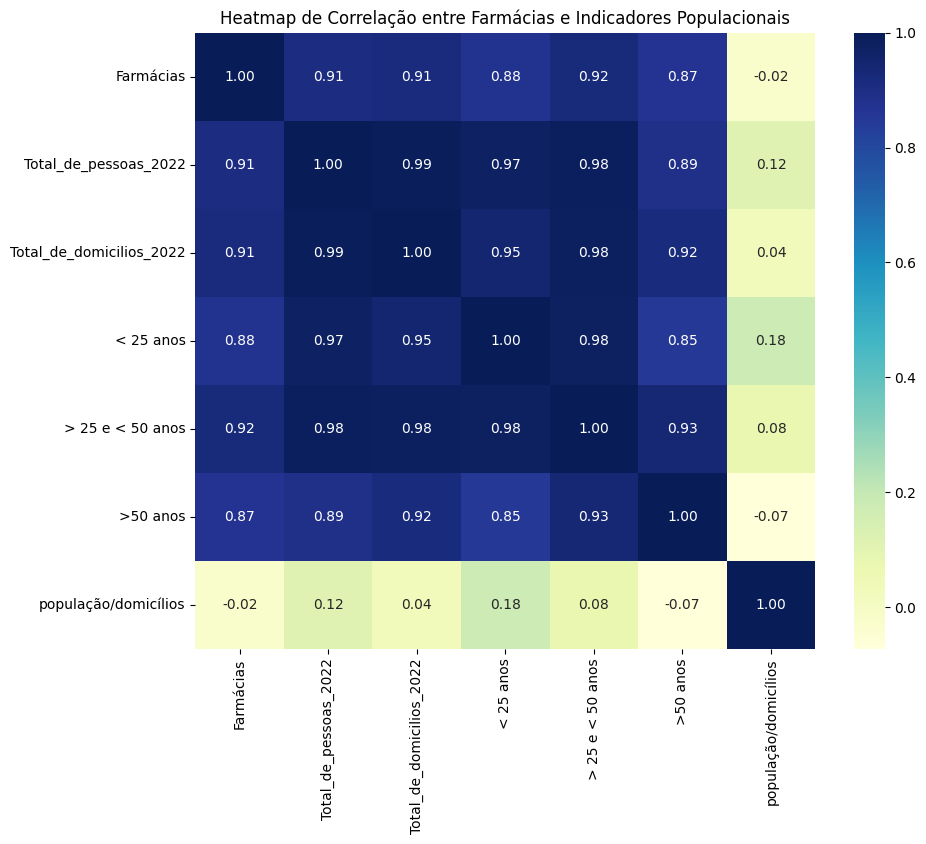

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculando a correlação
correlation_matrix = farm_detail[[ 'Farmácias', 'Total_de_pessoas_2022',
                                   'Total_de_domicilios_2022', '< 25 anos',
                                   '> 25 e < 50 anos', '>50 anos','população/domicílios']].corr()

# Plotando o gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap de Correlação entre Farmácias e Indicadores Populacionais")
plt.show()

A tabela de correlação apresentada indica o relacionamento entre a quantidade de farmácias e diferentes indicadores populacionais nos bairros do Rio de Janeiro. Abaixo, uma análise detalhada desses coeficientes de correlação:

1. **Correlação entre Farmácias e Total de Pessoas (2022)**:
   - Existe uma forte correlação positiva de **0,91** entre o número de farmácias e o total de pessoas em 2022. Isso indica que, conforme a população do bairro aumenta, a quantidade de farmácias também tende a aumentar. Esse comportamento é esperado, pois uma população maior geralmente implica em uma demanda mais alta por serviços de saúde, incluindo farmácias.

2. **Correlação entre Farmácias e Total de Domicílios (2022)**:
   - A correlação entre farmácias e o total de domicílios é de **0,91**, o que sugere que bairros com mais residências também tendem a ter mais farmácias. Esse indicador reflete que a infraestrutura residencial e o tamanho populacional estão interligados, com mais farmácias surgindo para atender às necessidades dos moradores de uma área densamente habitada.

3. **Faixa Etária < 25 Anos e Farmácias**:
   - A correlação de **0,88** entre a quantidade de farmácias e a população com menos de 25 anos sugere uma forte relação. Bairros com mais jovens geralmente têm uma maior presença de farmácias, possivelmente porque esses bairros são mais populosos em geral, ou devido à presença de famílias jovens que demandam produtos como medicamentos de uso ocasional, produtos de higiene e cuidados infantis.

4. **Faixa Etária 25 a 50 Anos e Farmácias**:
   - A correlação de **0,92** entre a faixa etária de 25 a 50 anos e o número de farmácias é a mais forte entre as faixas etárias. Isso indica que bairros com uma população adulta expressiva tendem a ter mais farmácias. Esta faixa etária geralmente possui maior capacidade financeira e uma demanda variada que inclui medicamentos para condições de saúde iniciais, produtos de conveniência, cuidados de saúde mental e itens de autocuidado.

5. **Faixa Etária > 50 Anos e Farmácias**:
   - A correlação de **0,87** entre a população acima de 50 anos e a quantidade de farmácias é um pouco menor em comparação com as outras faixas etárias, mas ainda assim significativa. Bairros com uma população idosa elevada exigem farmácias bem abastecidas, especialmente com medicamentos de uso contínuo para doenças crônicas e produtos de apoio, como fraldas geriátricas e aparelhos de medição de pressão. A correlação menor pode ser devido ao fato de que bairros com muitos idosos tendem a ser menos densos, ou já possuírem uma infraestrutura de saúde mais estabelecida.

6. **Relação População por Domicílios e Farmácias**:
   - A correlação entre a razão população/domicílios e o número de farmácias é muito baixa (**-0,02**), sugerindo que a densidade média de pessoas por domicílio não tem uma influência direta sobre a quantidade de farmácias em um bairro. Esse resultado indica que o número de farmácias está mais relacionado ao número total de pessoas e domicílios do que à densidade por residência. Em outras palavras, o fator determinante é a quantidade absoluta de pessoas e domicílios, e não quantas pessoas, em média, residem em cada domicílio.

7. **Correlação Geral entre Faixas Etárias e Farmácias**:
   - No geral, todas as faixas etárias (< 25, 25 a 50 e > 50 anos) apresentam uma correlação positiva e elevada com a quantidade de farmácias. Isso sugere que farmácias são um serviço básico que atende a todas as faixas etárias, e sua presença está mais associada ao volume populacional total do bairro do que a uma faixa etária específica. No entanto, a faixa de 25 a 50 anos mostra a correlação mais forte, possivelmente indicando que esse grupo etário tem uma demanda mais variada e consistente por produtos de farmácia.

**Conclusão**:
Esses dados indicam que o número de farmácias em um bairro do Rio de Janeiro está fortemente associado ao tamanho da população e à quantidade de domicílios, independentemente da faixa etária específica. Bairros mais populosos e com mais residências tendem a possuir uma maior quantidade de farmácias para atender às necessidades da comunidade. A faixa etária de 25 a 50 anos apresenta a correlação mais forte, sugerindo que adultos jovens e de meia-idade, com seu consumo variado, têm uma influência significativa na presença de farmácias. A baixa correlação com a densidade de pessoas por domicílio reforça que o total populacional e de domicílios são os fatores primordiais para determinar a quantidade de farmácias em uma região.

### Renda

In [47]:
renda= pd.read_excel('/content/drive/MyDrive/Trabalho/Freelancer Farmácias/pop por renda rj.xls',
                     sheet_name='tratados')

In [48]:
renda

,Bairros,Renda domiciliar per capita média do 1º quinto mais pobre,Renda domiciliar per capita média do 2º quinto mais pobre,Renda domiciliar per capita média do 3º quinto mais pobre,Renda domiciliar per capita média do 4º quinto mais pobre,Renda domiciliar per capita média do quinto mais rico,Renda domiciliar per capita média do décimo mais rico
0,"Abolição, Água Santa e Encantado",136.46,471.35,807.52,1248.85,2904.26,3770.09
1,Acari e Parque Columbia,54.91,208.94,347.00,518.84,1670.11,2594.26
2,"Alto da Boa Vista, Tijuca, Praça da Bandeira",287.49,919.11,1781.68,3042.93,9094.08,13249.18
3,Anchieta,89.10,273.74,453.52,703.52,1832.97,2581.34
4,Andaraí,278.72,662.31,1270.58,2219.41,5263.72,7097.63
...,...,...,...,...,...,...,...
106,Vidigal e São Conrado,159.98,409.05,769.54,2680.52,11239.09,16324.78
107,Vigário Geral,19.23,180.72,324.30,544.59,1471.16,2033.97
108,Vila da Penha,360.10,703.39,1139.13,1832.93,4030.63,5392.52
109,Vila Isabel,228.86,561.65,1161.27,2276.46,6309.15,8966.37


In [49]:
renda['Bairros Individuais'] = renda['Bairros'].str.split(', | e ')
renda_expanded = renda.explode('Bairros Individuais').reset_index(drop=True)

In [50]:
# Extrai valores únicos de ambos os DataFrames
bairros_nomes = farm_detail['bairro_aproximado'].unique()
farm_nomes = renda_expanded['Bairros Individuais'].unique()

# Cria um dicionário de mapeamento entre 'farm_nomes' e o bairro mais próximo em 'bairros_nomes'
mapeamento_bairros = {nome: process.extractOne(nome, bairros_nomes)[0] for nome in farm_nomes}

In [51]:
# Usa o dicionário para criar a coluna 'bairro_aproximado' no DataFrame 'farm'
farm_detail['bairro_ajustado'] = farm_detail['bairro_aproximado'].map(mapeamento_bairros)

In [52]:
print(len(farm_detail))
farm_final = pd.merge(farm_detail,renda_expanded, left_on ='bairro_ajustado', right_on= 'Bairros Individuais', how = 'left' )
len(farm_final)

155


155

In [53]:
farm_final[[ 'Farmácias', 'Renda domiciliar per capita média do 1º quinto mais pobre',
       'Renda domiciliar per capita média do 2º quinto mais pobre',
       'Renda domiciliar per capita média do 3º quinto mais pobre',
       'Renda domiciliar per capita média do 4º quinto mais pobre',
       'Renda domiciliar per capita média do quinto mais rico',
       'Renda domiciliar per capita média do décimo mais rico']].corr().round(2)

,Farmácias,Renda domiciliar per capita média do 1º quinto mais pobre,Renda domiciliar per capita média do 2º quinto mais pobre,Renda domiciliar per capita média do 3º quinto mais pobre,Renda domiciliar per capita média do 4º quinto mais pobre,Renda domiciliar per capita média do quinto mais rico,Renda domiciliar per capita média do décimo mais rico
Farmácias,1.00,0.05,0.08,0.09,0.09,0.09,0.09
Renda domiciliar per capita média do 1º quinto mais pobre,0.05,1.00,0.93,0.89,0.86,0.79,0.77
Renda domiciliar per capita média do 2º quinto mais pobre,0.08,0.93,1.00,0.99,0.96,0.90,0.88
Renda domiciliar per capita média do 3º quinto mais pobre,0.09,0.89,0.99,1.00,0.99,0.93,0.92
Renda domiciliar per capita média do 4º quinto mais pobre,0.09,0.86,0.96,0.99,1.00,0.97,0.96
Renda domiciliar per capita média do quinto mais rico,0.09,0.79,0.90,0.93,0.97,1.00,1.00
Renda domiciliar per capita média do décimo mais rico,0.09,0.77,0.88,0.92,0.96,1.00,1.00


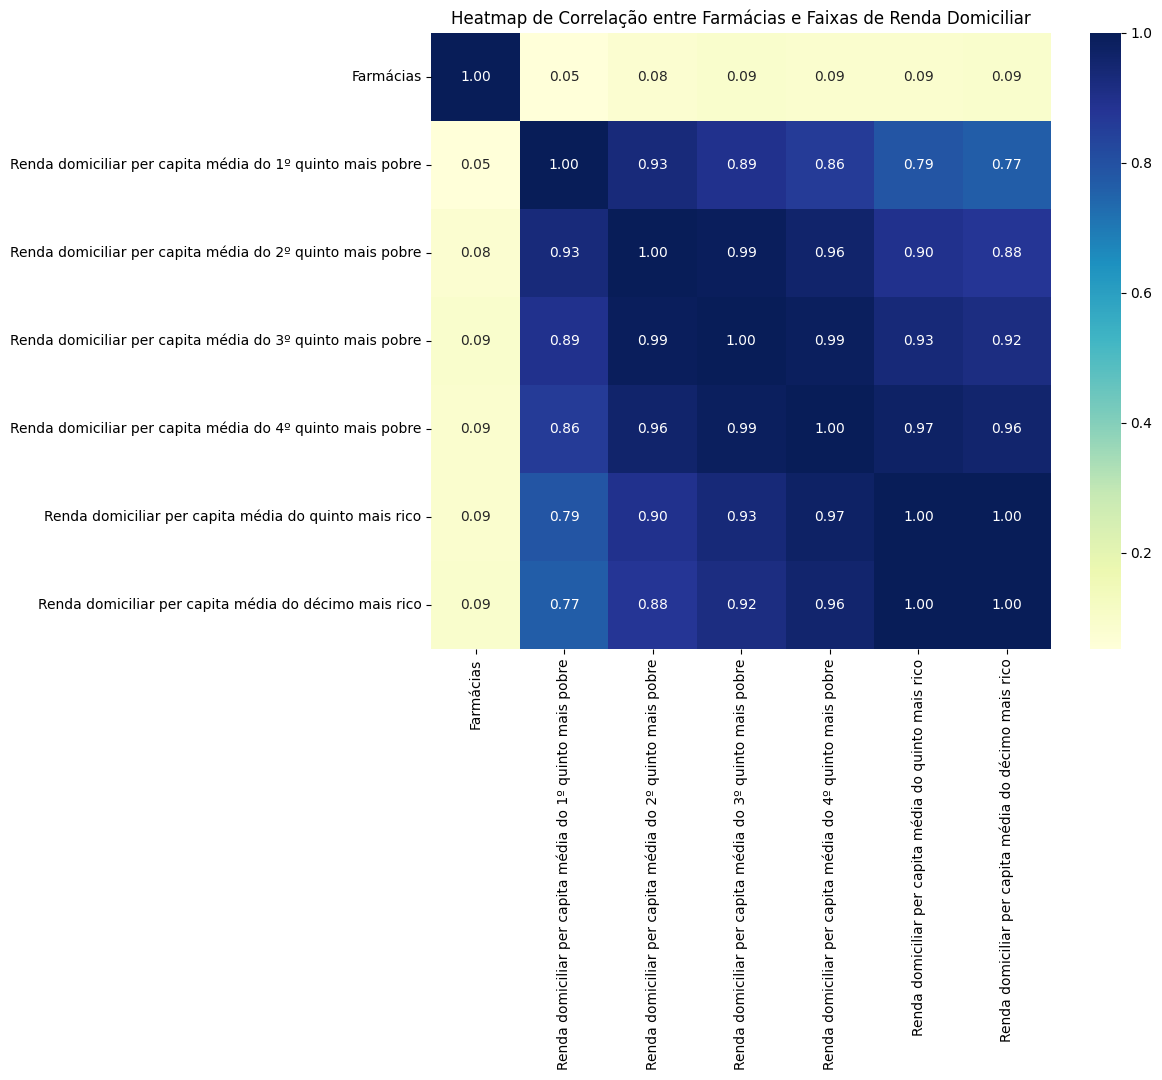

In [ ]:
# Calculando a correlação
correlation_matrix_renda = farm_final[[ 'Farmácias',
                                        'Renda domiciliar per capita média do 1º quinto mais pobre',
                                        'Renda domiciliar per capita média do 2º quinto mais pobre',
                                        'Renda domiciliar per capita média do 3º quinto mais pobre',
                                        'Renda domiciliar per capita média do 4º quinto mais pobre',
                                        'Renda domiciliar per capita média do quinto mais rico',
                                        'Renda domiciliar per capita média do décimo mais rico']].corr()

# Plotando o gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_renda, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap de Correlação entre Farmácias e Faixas de Renda Domiciliar")
plt.show()


Esta tabela mostra a correlação entre a quantidade de farmácias nos bairros e diferentes níveis de renda domiciliar per capita, segmentada em decis (decil) de renda do mais pobre ao mais rico. Aqui estão algumas observações sobre essa análise:

1. **Correlação Geral entre Renda e Farmácias**:
   - A correlação entre a quantidade de farmácias e as faixas de renda é geralmente baixa. Mesmo para os bairros mais ricos (décimo mais rico), a correlação com a quantidade de farmácias é de apenas **0,0918**, enquanto a correlação mais baixa ocorre para o primeiro quinto mais pobre (**0,052**).
   - Isso sugere que a presença de farmácias em um bairro não é fortemente determinada pela média de renda domiciliar, mas sim por outros fatores, como a densidade populacional e o perfil demográfico do bairro.

2. **Renda e Influência nas Farmácias**:
   - A correlação levemente mais alta com as rendas mais altas indica que, embora a renda não seja um fator determinante para a quantidade de farmácias, bairros mais ricos têm uma influência marginalmente maior na presença de farmácias em comparação com bairros mais pobres.
   - Esse resultado pode indicar que, em áreas mais ricas, há uma maior demanda por serviços de farmácias de qualidade ou especializados, embora a diferença seja pequena e não significativa para a determinação de localização.

3. **Correlação Interna entre Faixas de Renda**:
   - A tabela mostra uma forte correlação entre as faixas de renda entre si. Por exemplo, há uma correlação alta (0,929) entre o primeiro e o segundo quinto de renda mais pobre, e valores próximos de 1 entre as faixas de renda mais próximas. Isso indica que, dentro dos bairros, a renda é distribuída de forma relativamente homogênea entre as faixas, com uma continuidade entre quintos de renda próximos.
   - A alta correlação entre as diferentes faixas de renda reflete uma estrutura de renda dentro dos bairros que é mais influente na própria faixa do que na distribuição de serviços de farmácia.

4. **Interpretação Prática para Farmácias**:
   - A presença de farmácias não parece depender diretamente do nível de renda dos bairros, indicando que outros fatores (como população total, densidade populacional e idade) são mais relevantes para a localização de farmácias.
   - Farmácias que visam atender bairros mais ricos podem encontrar uma demanda por produtos de conveniência e serviços de saúde premium, mas a localização delas tende a seguir mais a densidade de moradores do que exclusivamente o poder aquisitivo.

5. **Impacto das Faixas de Renda Extrema**:
   - A correlação mais baixa com o primeiro quinto mais pobre e o décimo mais rico sugere que as farmácias, em geral, não se concentram exclusivamente em áreas de baixa ou altíssima renda. Isso pode indicar que a localização de farmácias é mais neutra quanto à renda e que elas atendem tanto áreas ricas quanto pobres sem uma diferença significativa baseada na média de renda.
   - Bairros com grande disparidade de renda podem ter farmácias que atendem um público diversificado, oferecendo produtos e serviços variados, mas a presença da farmácia em si não é diretamente influenciada pela variação de renda.

**Conclusão**:
A correlação entre a quantidade de farmácias e a renda média dos bairros do Rio de Janeiro é relativamente baixa, indicando que a renda, embora tenha um impacto leve, não é o principal determinante para a presença de farmácias. Outras variáveis, como o tamanho e a composição etária da população, podem ser mais influentes. Esse entendimento sugere que as farmácias buscam atender a um público amplo e diversificado, mantendo uma distribuição geográfica que acompanha mais o número de moradores do que a média de renda local.

# CONCLUSÃO - DECISÃO ESTRATÉGICA DE MARKETING

**Conclusão do Relatório e Recomendações Estratégicas para Campanha de Marketing de Farmácias no Rio de Janeiro**

A análise integrada das informações demográficas, de renda e da distribuição de farmácias no Rio de Janeiro revela um cenário complexo, com distintas necessidades de mercado em cada bairro. O comportamento da demanda por farmácias na cidade não é determinado exclusivamente pela renda, mas sim por uma combinação de fatores, incluindo densidade populacional e perfil etário. Abaixo, detalhamos as conclusões e apresentamos ações recomendadas que podem orientar uma campanha de marketing eficaz, adaptada às características específicas de cada região.

### 1. **Bairros Populosos com Concentração de Jovens e Adultos** – Campo Grande, Bangu, Santa Cruz

Esses bairros da Zona Oeste apresentam alta densidade populacional, combinada com uma significativa presença de jovens e adultos de 25 a 50 anos. Este perfil demográfico é caracterizado por uma demanda diversificada em produtos e serviços, incluindo medicamentos de uso ocasional, produtos de higiene, suplementos, e itens de conveniência, que são essenciais para famílias e adultos jovens.

**Ações Recomendadas**:
- **Campanhas de Alta Frequência**: Utilizar campanhas de anúncios digitais em redes sociais, focando em conveniência e acessibilidade dos produtos, para atingir o público jovem e adulto que busca rapidez e praticidade.
- **Ofertas de Produtos Essenciais**: Promover regularmente medicamentos de uso comum (analgésicos, antigripais, antialérgicos), itens de higiene e cuidados pessoais. Esse tipo de campanha pode incluir descontos ou promoções em itens de alto consumo.
- **Marketing de Proximidade**: Utilizar geolocalização em anúncios e explorar a parceria com aplicativos de delivery para facilitar a entrega rápida e prática de produtos, reforçando a presença da farmácia nas rotinas diárias dos consumidores.
- **Campanhas Focadas em Saúde Preventiva**: Jovens adultos estão cada vez mais atentos à saúde preventiva. Assim, campanhas de marketing que enfatizem suplementos, vitaminas e produtos de bem-estar podem captar essa atenção, posicionando a farmácia como um local de cuidado contínuo.

### 2. **Bairros com Alta Concentração de Idosos** – Copacabana, Tijuca, Realengo

Copacabana e Tijuca, em especial, possuem uma população idosa significativa. Esse público tem uma demanda elevada por medicamentos de uso contínuo e produtos específicos para o cuidado da saúde, como suplementos geriátricos e dispositivos de monitoramento (aparelhos de pressão, glicosímetros). Esses bairros também representam uma oportunidade de criar um diferencial competitivo com serviços de consultoria e atenção farmacêutica personalizada.

**Ações Recomendadas**:
- **Campanhas Educativas sobre Saúde**: Lançar campanhas que informem sobre o uso correto de medicamentos, prevenção de doenças crônicas e gestão de saúde para idosos. Isso pode ser feito por meio de conteúdos educativos em redes sociais e materiais informativos impressos nas lojas.
- **Programa de Fidelidade para Medicamentos de Uso Contínuo**: Desenvolver um programa de fidelidade específico para clientes que precisam comprar medicamentos de uso contínuo, oferecendo descontos progressivos, benefícios ou até mesmo a entrega gratuita em domicílio.
- **Parcerias com Profissionais de Saúde**: Parcerias com médicos e clínicas locais podem ser efetivas para promover a farmácia como referência em cuidados geriátricos, incentivando recomendações de profissionais de saúde para que os idosos procurem as farmácias da rede para adquirir produtos essenciais.
- **Serviços de Entrega Especializada**: Implementar ou promover serviços de entrega gratuita ou com desconto para clientes idosos, que muitas vezes têm dificuldade em se deslocar, garantindo assim um acesso mais facilitado aos medicamentos de que necessitam.

### 3. **Bairros com Alta Renda e Potencial para Produtos Premium** – Alto da Boa Vista, Tijuca, Praça da Bandeira

Os bairros com maior poder aquisitivo representam uma oportunidade para uma segmentação mais premium. Nesses locais, o perfil de consumo valoriza não apenas o preço, mas também a qualidade e exclusividade dos produtos. A renda média elevada sugere que farmácias que investirem em produtos e serviços premium podem captar uma parcela de mercado disposta a investir mais em saúde e bem-estar.

**Ações Recomendadas**:
- **Posicionamento Premium e Marketing de Valor**: Destacar produtos de cuidado pessoal, dermocosméticos, e suplementos de marcas reconhecidas e de alta qualidade, posicionando a farmácia como uma referência em bem-estar e saúde sofisticada. Campanhas de redes sociais e anúncios em Google podem reforçar esse posicionamento premium.
- **Ofertas de Produtos Exclusivos e Importados**: Inserir produtos exclusivos que atendam ao perfil de consumidores mais exigentes, como cosméticos importados, suplementos de qualidade superior e acessórios para bem-estar, como difusores e produtos naturais.
- **Consultoria e Experiência Personalizada**: Implementar programas de consultoria personalizada em saúde e beleza, com farmacêuticos treinados para orientar o uso de produtos de cuidados especiais, como dermocosméticos e tratamentos para pele. Campanhas de marketing podem destacar esse diferencial para atrair o público-alvo.
- **Eventos de Lançamento e Testes de Produtos**: Realizar eventos de lançamento e sessões de testes de produtos para criar uma experiência premium e permitir que clientes experimentem novos produtos. Isso pode ser promovido com antecedência por campanhas de e-mail marketing e parcerias com influenciadores locais.

### 4. **Estratégias Gerais para Ampliar o Alcance e Reforçar a Presença das Farmácias**

Com base nos insights sobre a distribuição de farmácias, população e renda, é possível adotar ações que beneficiem a presença e a acessibilidade das farmácias em bairros de diferentes perfis:

- **Segmentação Geográfica para Anúncios Digitais**: Utilizar dados de localização e segmentação por bairro para direcionar anúncios conforme o perfil de cada região. Por exemplo, campanhas específicas para bairros com alta densidade populacional devem destacar conveniência e proximidade, enquanto bairros de renda alta podem receber anúncios focados em produtos premium e exclusivos.
  
- **Campanhas com Base em Datas Sazonais**: Planejar campanhas que atendam às necessidades sazonais, como cuidados com a saúde respiratória em períodos de inverno e produtos de proteção solar no verão, especialmente em bairros de perfil jovem e familiar.

- **Parcerias com Aplicativos de Saúde e Bem-Estar**: Integrar as farmácias a plataformas de aplicativos de saúde para alcançar consumidores que estão buscando informações sobre bem-estar e saúde, ampliando o canal de comunicação para novos públicos.

- **Promoção de Saúde Comunitária**: Patrocinar ou organizar eventos de saúde e bem-estar nos bairros, como feiras de saúde e palestras educativas, que reforcem a farmácia como um parceiro de confiança em cuidados de saúde. Essas ações geram reconhecimento e credibilidade para a marca e aproximam a farmácia das necessidades da comunidade.

### Conclusão

Esta análise permite que a campanha de marketing para farmácias no Rio de Janeiro seja altamente direcionada, com uma compreensão detalhada das necessidades e expectativas de diferentes perfis demográficos e socioeconômicos. Em bairros mais populosos e com uma faixa etária jovem-adulta, as campanhas devem valorizar a conveniência e a diversidade de produtos de uso diário. Em bairros com uma população idosa significativa, a abordagem deve ser voltada ao cuidado contínuo e à acessibilidade. E para áreas de alta renda, a oferta de produtos premium e experiências personalizadas se alinha bem com as expectativas dos consumidores.

A implementação dessas ações, adaptadas às características de cada bairro, fortalecerá a presença das farmácias na cidade, promoverá o engajamento da população com a marca e aumentará a fidelização dos clientes. Dessa forma, a campanha não apenas atenderá às necessidades específicas de cada região, mas também consolidará as farmácias como referência em cuidado e conveniência para todos os públicos.

Sugestão de leitura https://geofusion.com.br/blog/tag/farmacias-onmaps/